**Task 03 : IRIS FLOWER CLASSIFICATION**

Description: I have used the Iris dataset to build a model that can classify iris flowers into different speccies based on their and petal measurements.

**FLOW ANALYSIS:**

* Importing Libraries

* Data loading

* Data Understanding

* Data Visualization

* Data Encoding

* Spliting training and test data

* Model training - KNeighbors Classifier

* Model Evaluation - Prediction
  * Classification Report and Confusion Matrix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Dataset Loading
iris_data = pd.read_csv('/content/drive/MyDrive/CodSoft/IRIS.csv', encoding='latin-1')

**Data Understanding**

In [4]:
# Displaying the first 5 rows of the dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Displaying total rows and columns of the dataset
iris_data.shape

(150, 5)

In [6]:
# It will calculate and display count, mean, std, min, max, 25%, 50% and 75% of numeric columns here only "Rating" column.
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Displaying information regarding datatype, null values of every column
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Checking for null values
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Displaying the number of samples in each class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Data Visualization**

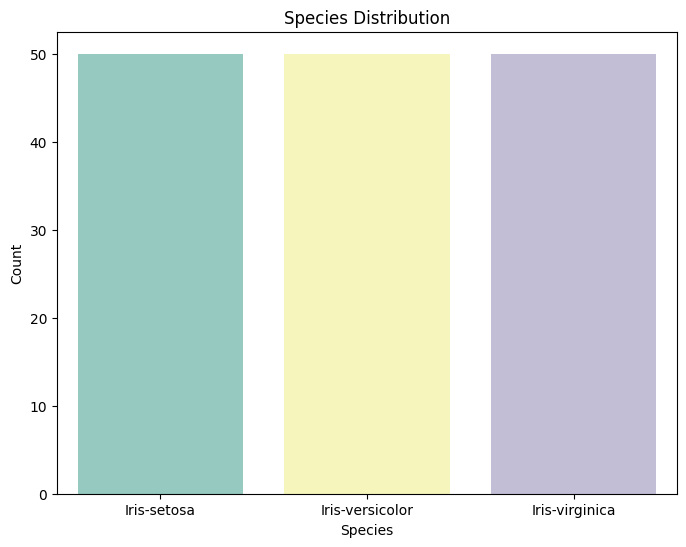

In [10]:
# Displaying the Bar plot of species distribution
species_counts = iris_data['species'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="Set3")
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.show()

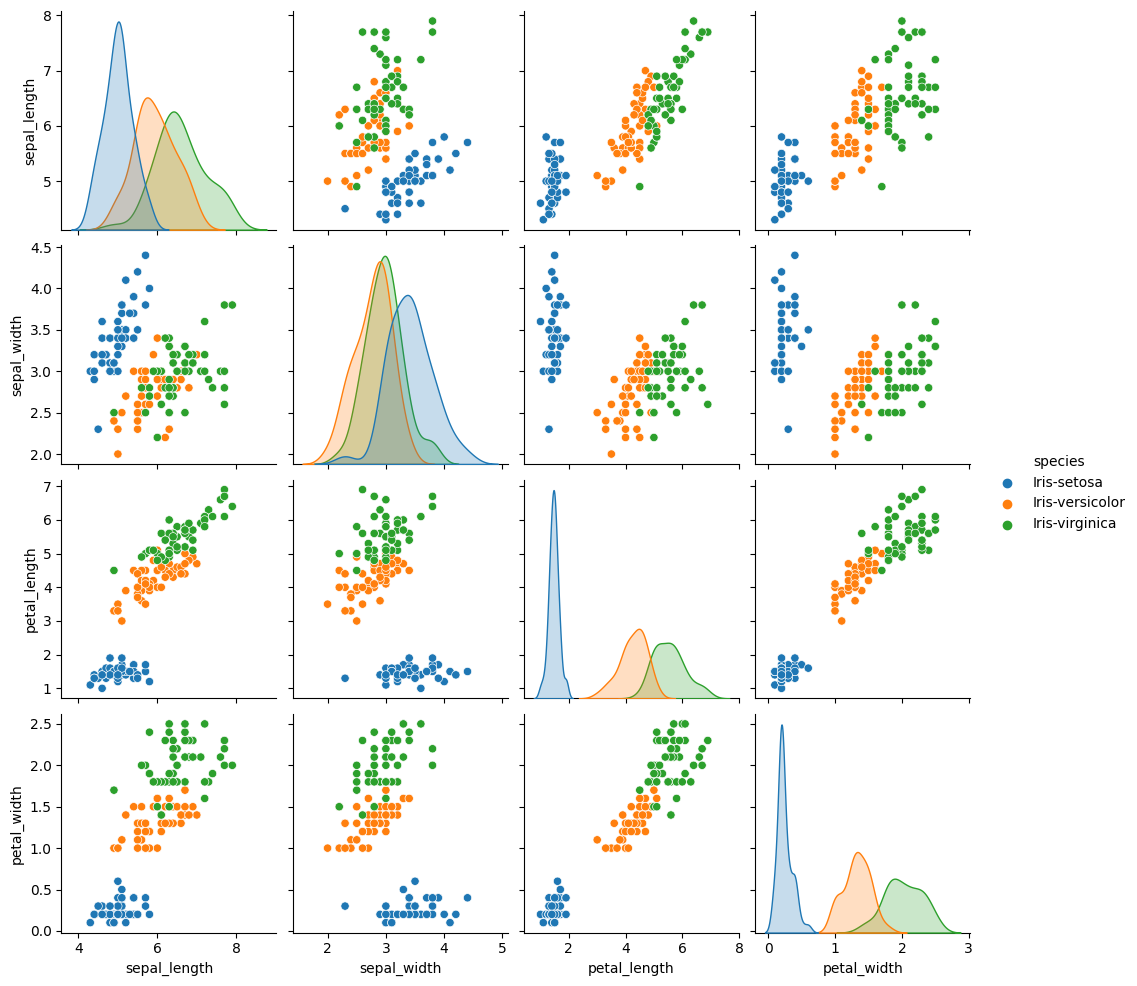

In [11]:
# Displaying the Pairplot to visualize relationships between features
sns.pairplot(iris_data, hue='species')
plt.show()

<ipython-input-12-7ff76ed9ad6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = iris_data.corr()


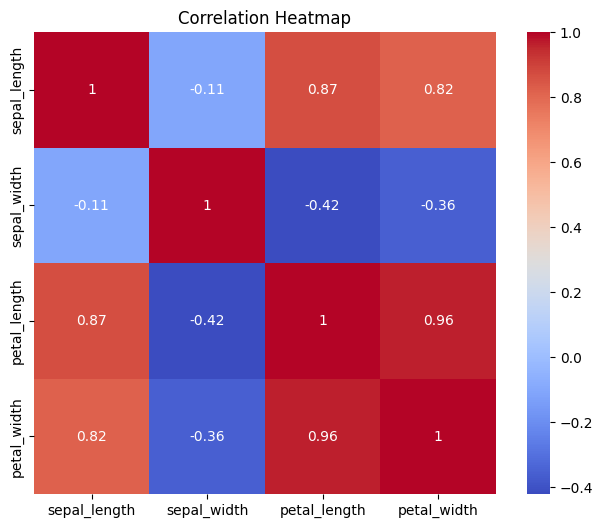

In [12]:
# Correlation matrix
corr_matrix = iris_data.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


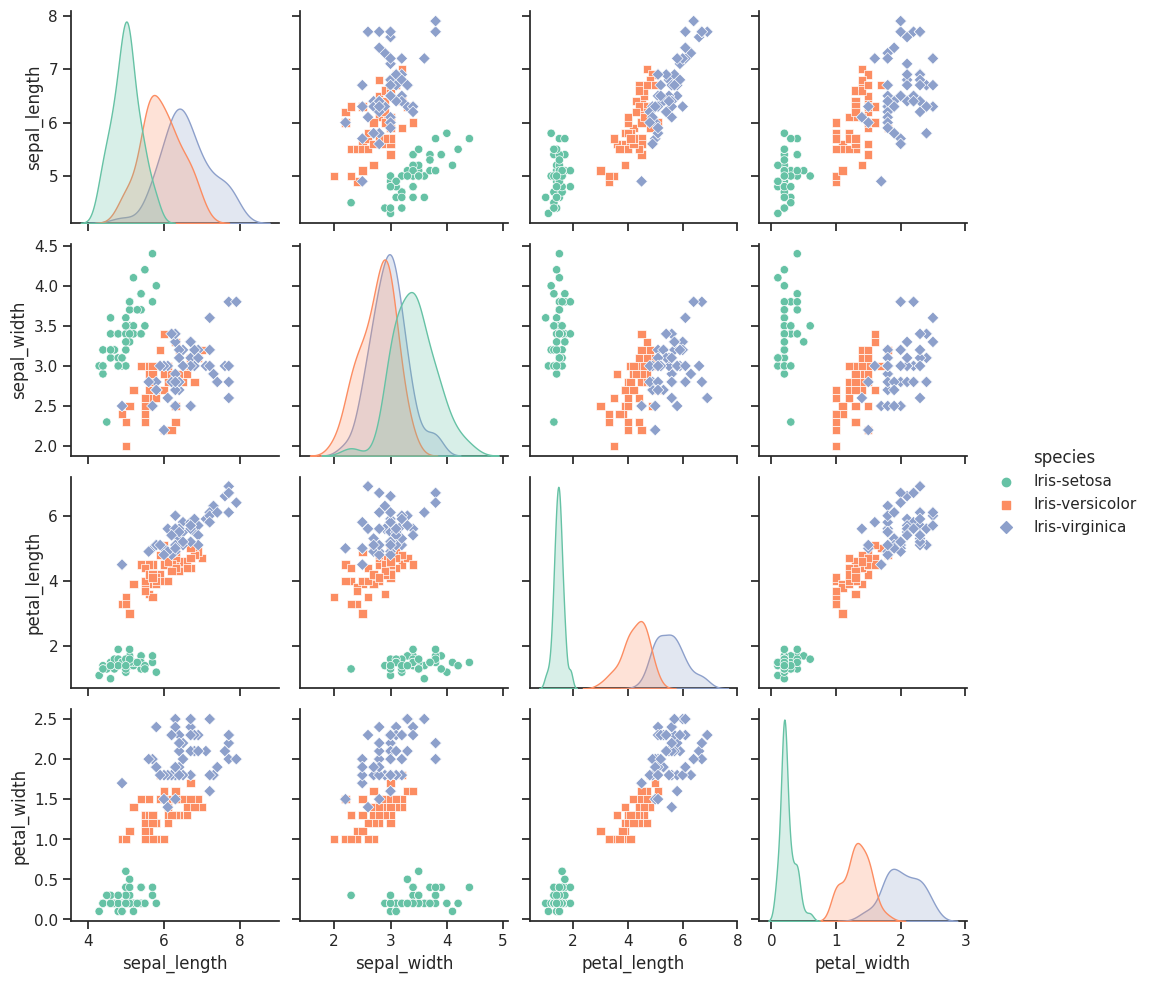

In [13]:
# Pairwise scatterplots colored by species
sns.set(style="ticks")
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()

**Data Encoding**

In [14]:
# Encode the target column 'species'
labelencoder = LabelEncoder()
iris_data['species'] = labelencoder.fit_transform(iris_data['species'])

**Model Training**

In [15]:
# Splitting into training and testing datasets
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Applying MinMax Scaling
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [19]:
model=KNeighborsClassifier()

In [20]:
model.fit(X_train, y_train)

KNeighborsClassifier()

**Model Evaluation**

In [21]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [22]:
# Calculating accuracy and its percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Displaying accuracy in percentage
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


**Classification Report**

In [23]:
# Displaying classification report
report = classification_report(y_test, y_pred, target_names=labelencoder.classes_)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

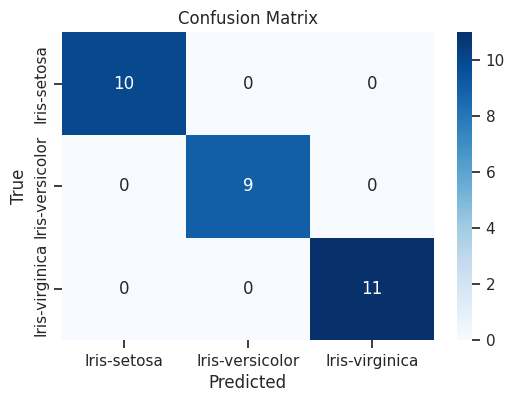

In [25]:
colors = ['#d0bad7', '#c5019c']

cmap = sns.color_palette(colors)

# Displaying a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
